<a href="https://colab.research.google.com/github/Suranjana-Kajli/Student-score-prediction/blob/main/Student_score_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Model to predict student's grades**

In [1]:
## LOADING THE REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import altair as alt
from tqdm import tqdm 
import tensorflow as tf
from  tensorflow.keras.preprocessing.sequence import pad_sequences
from  sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [2]:
#reading the given csv files
df=pd.read_csv('student-mat.csv')
df1=pd.read_csv('student-por.csv')

In [3]:
#merging the two datasets together
new_df = pd.concat([df,df1])
new_df.isnull().values.any()

False

In [4]:
print(new_df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


## Exploratory data Analysis

In [5]:
df.shape

(395, 33)

In [6]:
df1.shape

(649, 33)

In [7]:
new_df.shape

(1044, 33)

In [8]:
new_df=new_df.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
new_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,MS,F,19,R,GT3,A,1,1,at_home,at_home,course,other,2,2,3,no,yes,no,yes,yes,no,no,yes,3,5,4,1,4,1,0,8,0,0
611,MS,F,18,R,GT3,T,2,2,services,other,home,mother,2,3,0,no,no,no,no,yes,yes,yes,yes,4,2,1,1,1,4,5,14,14,15
618,MS,F,18,R,LE3,A,1,2,at_home,other,course,mother,3,2,0,no,no,no,no,yes,yes,no,yes,4,3,4,1,4,5,0,16,15,15
632,MS,F,19,R,GT3,T,1,1,at_home,other,course,other,2,2,1,no,yes,no,no,yes,yes,yes,yes,4,3,3,1,1,3,4,7,8,9


In [9]:
new_df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No null values were found

In [10]:
new_df['G3'].describe()

count    662.000000
mean      10.725076
std        4.106738
min        0.000000
25%        9.000000
50%       11.000000
75%       13.000000
max       20.000000
Name: G3, dtype: float64

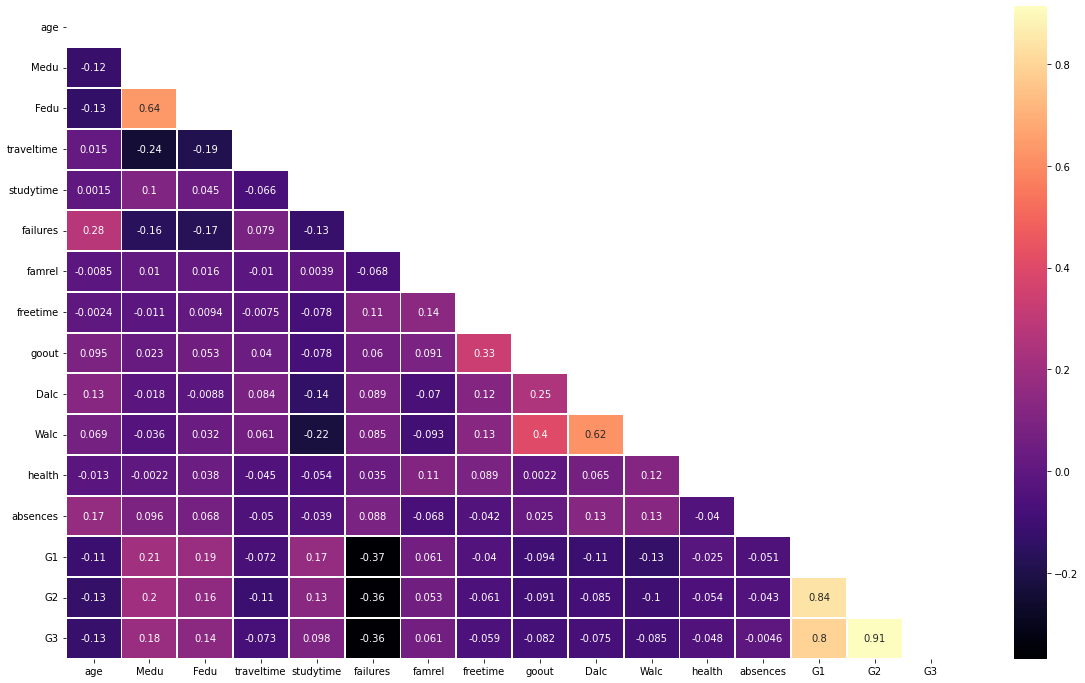

In [11]:
plt.figure(figsize=(20, 12))
matrix = np.triu(new_df.corr())
sns.heatmap(new_df.corr(), annot=True,mask=matrix, linewidth=1, cmap="magma");

In [12]:
new_df.corr()['G3'].sort_values()


failures     -0.359377
age          -0.127446
Walc         -0.084689
goout        -0.081691
Dalc         -0.075212
traveltime   -0.073488
freetime     -0.058860
health       -0.047812
absences     -0.004601
famrel        0.061296
studytime     0.097863
Fedu          0.137159
Medu          0.182611
G1            0.796569
G2            0.913548
G3            1.000000
Name: G3, dtype: float64

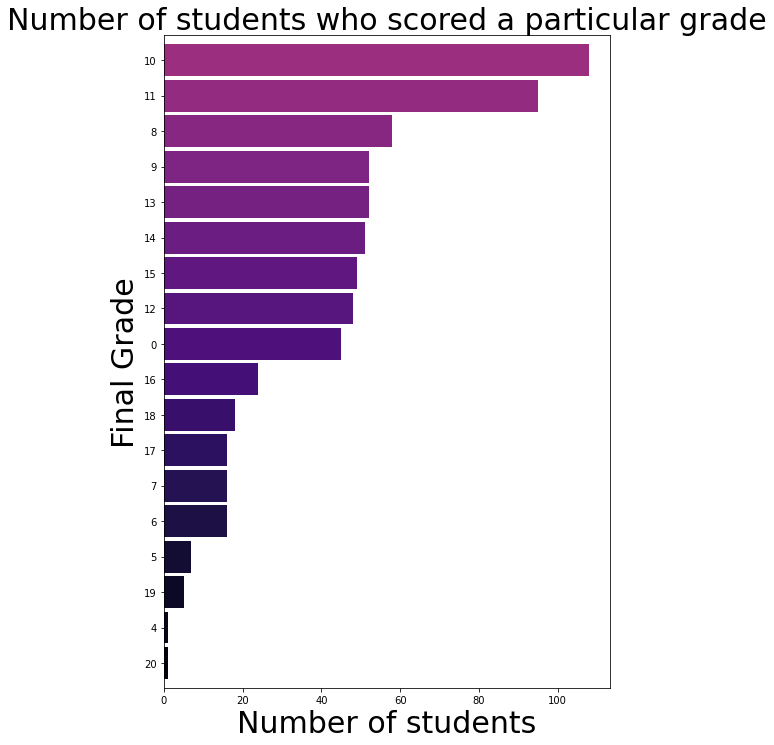

In [13]:
plt.subplots(figsize=(8,12))
grade_counts = new_df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('magma',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

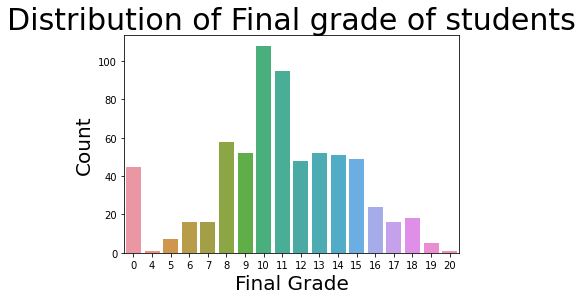

In [14]:
b = sns.countplot(new_df['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

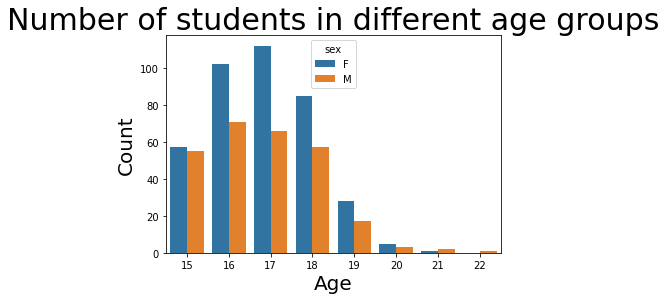

In [15]:
b = sns.countplot('age',hue='sex', data=new_df)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=20)
b.set_ylabel("Count",fontsize=20)
plt.show()

In [16]:
new_df['sex'].value_counts()


F    390
M    272
Name: sex, dtype: int64

In [17]:
alt.Chart(new_df).mark_line(opacity =1,point = True).encode(x = alt.X('Walc:Q', bin = alt.Bin(maxbins=10),scale = alt.Scale(zero = False),axis = alt.Axis(title = 'Alcohol Consumption (0 = very low, 5 = very high)')), y = alt.Y('count()',stack = None),color = alt.Color('sex',scale=alt.Scale(scheme='set1'))).properties(title = "Distribution of Alcohol consumption by Gender")

alt.Chart(...)

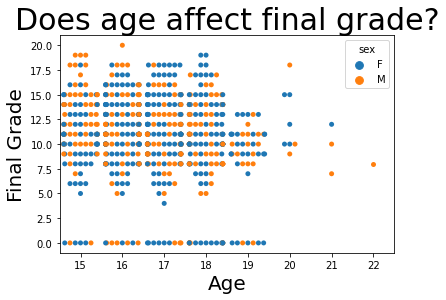

In [18]:
b = sns.swarmplot(x='age', y='G3',hue='sex', data=new_df)
b.axes.set_title('Does age affect final grade?', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

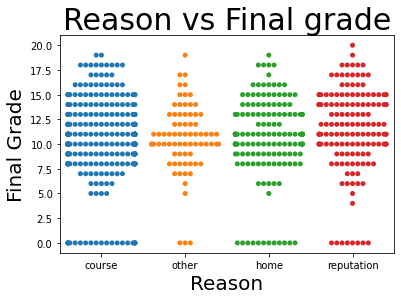

In [19]:
b = sns.swarmplot(x='reason', y='G3', data=new_df)
b.axes.set_title('Reason vs Final grade', fontsize = 30)
b.set_xlabel('Reason', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()


In [20]:
category_df = new_df.select_dtypes(include=['object'])

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the grade back in the dataframe
dummy_df['G3'] = new_df['G3']

# Find correlations with grade
dummy_df.corr()['G3'].sort_values()


higher_no           -0.193290
Mjob_at_home        -0.120690
romantic_yes        -0.111657
internet_no         -0.092022
guardian_other      -0.087041
schoolsup_yes       -0.078714
famsize_GT3         -0.077060
address_R           -0.073442
reason_course       -0.071148
school_MS           -0.047501
Fjob_at_home        -0.042493
paid_no             -0.034877
Fjob_services       -0.033208
nursery_no          -0.032107
Mjob_other          -0.028507
sex_F               -0.028266
Pstatus_T           -0.022031
Fjob_other          -0.018149
reason_home         -0.017972
famsup_yes          -0.013572
guardian_mother     -0.011451
activities_yes      -0.010534
reason_other        -0.010112
activities_no        0.010534
famsup_no            0.013572
Pstatus_A            0.022031
sex_M                0.028266
nursery_yes          0.032107
paid_yes             0.034877
Mjob_services        0.039785
Fjob_health          0.042534
school_GP            0.047501
guardian_father      0.070709
Mjob_teach

In [21]:
# selecting the most correlated values and dropping the others
labels = new_df['G3']

# drop the school and grade columns
new_df1 = new_df.drop(['school', 'G1', 'G2'], axis='columns')
    
# One-Hot Encoding of Categorical Variables
new_df1 = pd.get_dummies(new_df1)
new_df1.head()
use_df=pd.get_dummies(new_df)
use_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,19,1,1,2,2,3,3,5,4,1,4,1,0,8,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1
611,18,2,2,2,3,0,4,2,1,1,1,4,5,14,14,15,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1
618,18,1,2,3,2,0,4,3,4,1,4,5,0,16,15,15,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1
632,19,1,1,2,2,1,4,3,3,1,1,3,4,7,8,9,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1


In [22]:
# Find correlations with the Grade
most_correlated = new_df1.corr().abs()['G3'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:9]
most_correlated

G3              1.000000
failures        0.359377
higher_yes      0.193290
higher_no       0.193290
Medu            0.182611
Fedu            0.137159
age             0.127446
Mjob_at_home    0.120690
Fjob_teacher    0.119463
Name: G3, dtype: float64

In [23]:
#I tried to use only the important features but the model accuracy decreased so I went ahead with using all the features
#new_df2 = use_df[['G3','failures','higher_yes','higher_no','Medu','Fedu','age','Mjob_at_home','Fjob_teacher']]
#small_df=new_df.loc[:, ["G1", "G2"]]

#new_df2=pd.concat([new_df2,small_df],axis=1)
#new_df2 = new_df1[['G3','failures','higher_yes','higher_no','Medu','Fedu','age','Mjob_at_home','Fjob_teacher','G1','G2']]

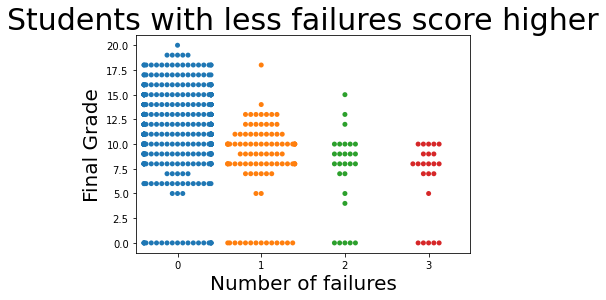

In [24]:
b = sns.swarmplot(x=new_df1['failures'],y=new_df1['G3'])
b.axes.set_title('Students with less failures score higher', fontsize = 30)
b.set_xlabel('Number of failures', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

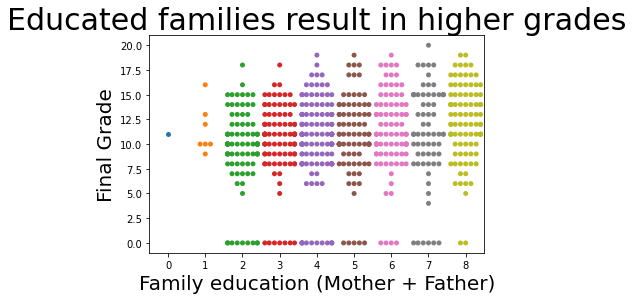

In [25]:
b = sns.swarmplot(x=new_df1['Fedu']+new_df1['Medu'],y=new_df1['G3'])
b.axes.set_title('Educated families result in higher grades', fontsize = 30)
b.set_xlabel('Family education (Mother + Father)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

In [26]:
new_df1 = new_df1.drop('higher_no', axis='columns')
new_df1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,0


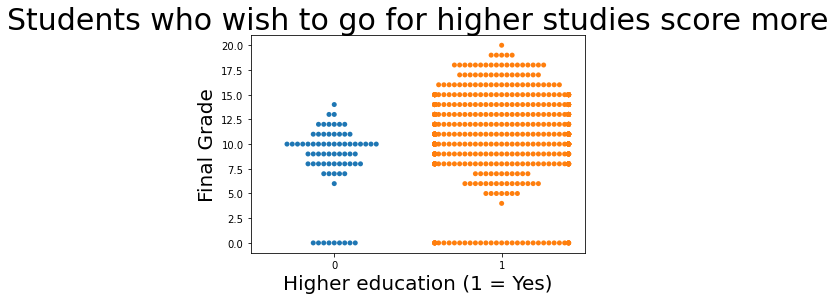

In [27]:
b = sns.swarmplot(x = new_df1['higher_yes'], y=new_df1['G3'])
b.axes.set_title('Students who wish to go for higher studies score more', fontsize = 30)
b.set_xlabel('Higher education (1 = Yes)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

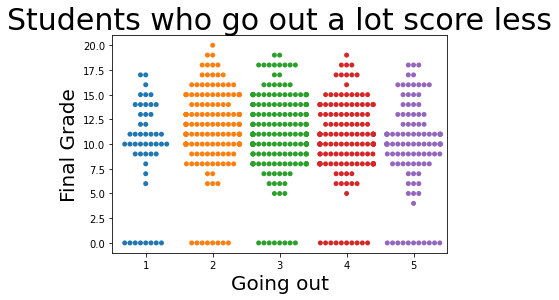

In [28]:
b = sns.swarmplot(x=new_df['goout'],y=new_df['G3'])
b.axes.set_title('Students who go out a lot score less', fontsize = 30)
b.set_xlabel('Going out', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

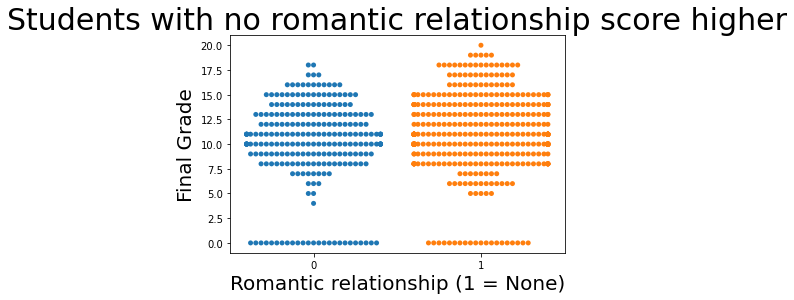

In [29]:
b = sns.swarmplot(x=new_df1['romantic_no'],y=new_df1['G3'])
b.axes.set_title('Students with no romantic relationship score higher', fontsize = 30)
b.set_xlabel('Romantic relationship (1 = None)', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()

Splitting the data into training and testing data (70% and 30%)
We mention the random state to achieve the same split everytime we run the code

In [30]:
#label=new_df['G3']
#X_train, X_test, y_train, y_test = train_test_split(new_df2, label, test_size = 0.30, random_state=42)
#X_train.head()
label=new_df['G3']
X_train, X_test, y_train, y_test = train_test_split(use_df, label, test_size = 0.30, random_state=42)
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
358,18,1,1,2,1,0,3,3,2,1,2,3,4,10,10,10,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1
212,16,2,2,1,2,0,3,3,4,1,1,4,0,12,13,14,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0
260,18,4,3,1,2,0,3,1,2,1,3,2,21,17,18,18,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1
411,17,4,4,1,3,0,4,4,2,1,2,4,2,12,15,15,1,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0
410,17,2,2,1,2,0,4,3,4,1,3,4,0,13,17,17,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,0


In [31]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators = 100, n_jobs = 1,random_state =1)

    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','model_score'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        model_score=r2_score(predictions,y_test)*100
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse,model_score]
    
    
    return results


In [32]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse,model_score
Linear Regression,1.08012,1.68113,79.7008
ElasticNet Regression,0.961439,1.64157,77.4009
Random Forest,0.961407,1.50258,84.1283
Extra Trees,1.11849,1.69382,80.7267
SVM,1.20978,1.88024,60.1216
Gradient Boosted,0.969924,1.50744,83.1172


The Random Forest Regressor Model works best with 84.1% Accuracy on this Dataset